# 課題発表（稲田）

kickstarterのデータを用いて、プロジェクトが成功するかどうかの判定を行った。

以下の順で説明する。

1. ロジスティック回帰

2. 木モデル（ランダムフォレスト）

3. ニューラルネットワーク

4. 結論

5. ニューラルネットワーク参考


## 1. ロジスティック回帰

ロジスティック回帰で計算した結果は以下のようになった

- グリッドサーチでパラメータを探索
- 特徴量選択はなし。
- ホールドアウト（グリッドサーチで交差検証）

ホールドアウト検証結果

- 対数尤度 = -11.229
- 正答率（Accuracy） = 67.488%
- 適合率（Precision） = 61.537%
- 再現率（Recall） = 50.517%
- F1値（F1-score） = 55.485%
- {'fit_intercept': False, 'max_iter': 1000, 'penalty': 'elasticnet'} 0.6752053968493253

## 2. 木モデル（ランダムフォレスト）

- グリッドサーチでパラメータを探索
- 特徴量選択はなし。
- ホールドアウト（グリッドサーチで交差検証）

ホールドアウト検証結果
- 対数尤度 = -11.007
- 正答率（Accuracy） = 68.133%
- 適合率（Precision） = 62.855%
- 再現率（Recall） = 50.242%
- F1値（F1-score） = 55.845%
- {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 20} 0.6795432275570965

## 3. ニューラルネットワーク

以下のモデルで学習した。

- epoc数 20
- バッチ分割数 20
- 計算時間がかかるため、グリッドサーチは行っていない。

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=353))
model.add(Dense(64, activation='relu', input_dim=256))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=adad,
              metrics=['accuracy'])

Epoch 20/20
232172/232172 [==============================] - 20s 85us/sample - loss: 0.5811 - acc: 0.6848 - val_loss: 0.5845 - val_acc: 0.6823

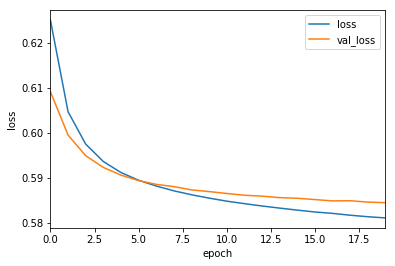

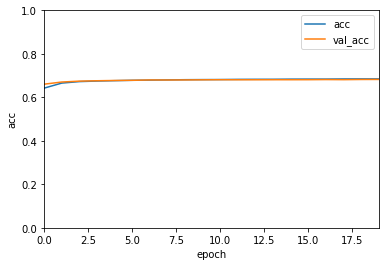

### ホールドアウトの結果
上記モデルをホールドアウト法で検証した結果は以下の通り。

ホールドアウト検証結果
- 対数尤度 = -10.944
- 正答率（Accuracy） = 68.314%
- 適合率（Precision） = 62.847%
- 再現率（Recall） = 51.370%
- F1値（F1-score） = 56.532%


## 4. 結論
各学習方法で試したが、飛び抜けて優秀な正答率がでたものはなく、どれも良いものでも67-68%程度の正答率だった。

（モデルの選択によっては、訓練データで80%超えすることもあったが、汎化性のは比例せず、過学習となっていた。）

ただし、学習方法により計算時間の速度の差がかなりあり、持ち時間内に終わらせるための考慮も必要かと思われる。

今後の課題としては以下のことが考えられる。
- 新しい説明変数の発見
    - 特に名前関係
- 説明変数の取捨選択
    - 明確にどうするかはわからないが
- グリッドサーチの範囲を拡大
    - 時間や計算パワーがある場合は、ニューラルネットワークでもモデルなどを多数試す。


## 5. ニューラルネットワーク参考

パラメータとしてモデルがいくらでも考えられるので、いくつか試した。
その中で、いくつか参考に挙げておく。


### 5.1. モデル1

中間層を増やした。

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=353))
model.add(Dense(64, activation='relu', input_dim=256))
model.add(Dense(16, activation='relu', input_dim=64))　# 増やした層
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=adad,
              metrics=['accuracy'])

fit_model(model,20,20,X_train, y_train, X_test, y_test)

Epoch 20/20
232172/232172 [==============================] - 20s 86us/sample - loss: 0.5795 - acc: 0.6859 - val_loss: 0.5847 - val_acc: 0.6819

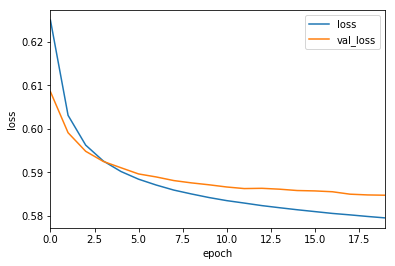

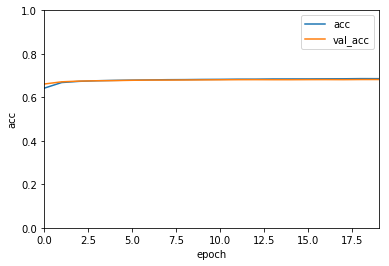

（結果）
訓練誤差と汎化誤差の差が開いた。

### 5.2. モデル2

中間層の各ニューロン数を同じにした。

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=353))
model.add(Dense(256, activation='relu', input_dim=256))
model.add(Dense(256, activation='relu', input_dim=256))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=adad,
              metrics=['accuracy'])

Epoch 20/20
232172/232172 [==============================] - 27s 115us/sample - loss: 0.5756 - acc: 0.6891 - val_loss: 0.5843 - val_acc: 0.6808

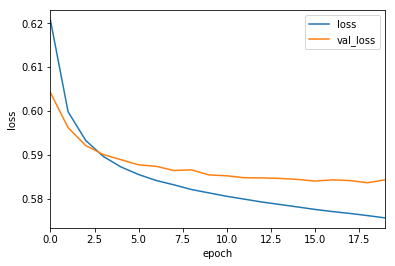

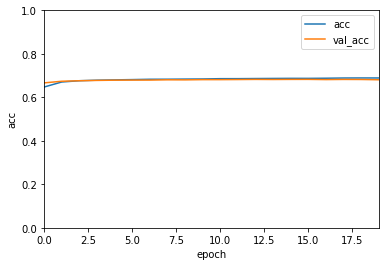

（結果）
訓練誤差と汎化誤差の差が開いた。

### 5.3. モデル3

最適化アルゴリズムを変えた。

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=353))
model.add(Dense(64, activation='relu', input_dim=256))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

Epoch 20/20
232172/232172 [==============================] - 20s 85us/sample - loss: 0.5565 - acc: 0.6918 - val_loss: 0.6194 - val_acc: 0.6585

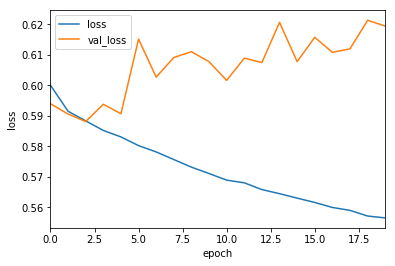

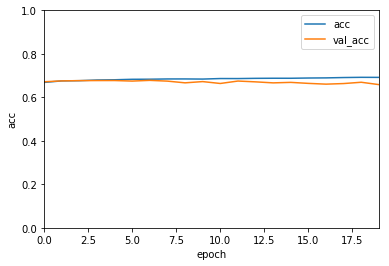

（結果）
明らかに過学習を起こしている。

### 5.4. モデル4
活性化関数をtanhに変えてみた。

In [ ]:
model = Sequential()
model.add(Dense(256, activation='tanh', input_dim=353))
model.add(Dense(64, activation='tanh', input_dim=256))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=adad,
              metrics=['accuracy'])

fit_model(model,20,20,X_train, y_train, X_test, y_test)

Epoch 20/20
232172/232172 [==============================] - 20s 88us/sample - loss: 0.5883 - acc: 0.6795 - val_loss: 0.5890 - val_acc: 0.6789

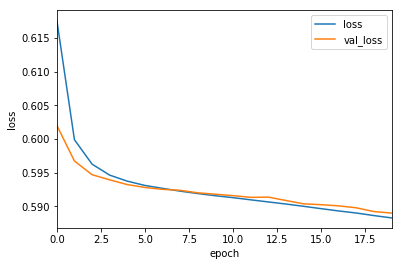

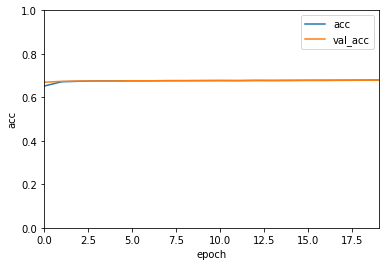

（結果）
訓練誤差と汎化誤差は離れていない。
ただ、ReLUに比べて、汎化性能が少し劣っている。